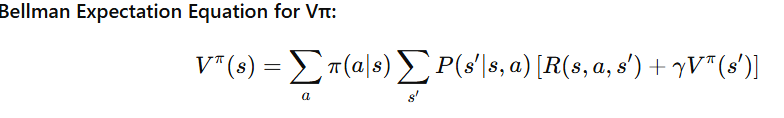

In [ ]:
# V: dictionary of state values, initially zero
# pi : current policy (dict mapping state → action)
# gamma is the discount factor

while not converged:
    for each state s:
        V[s] = sum over a of pi(a|s) * sum over s' of P(s'|s,a) * [R(s,a,s') + gamma * V[s']]


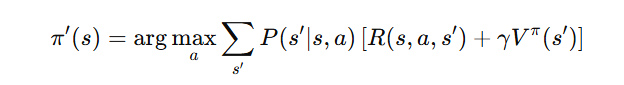

In [ ]:
# policy improvement
# gives a greedy policy with respect to Vpie.

for each state s:
    best_action = argmax_a (sum over s' of P(s'|s,a) * [R(s,a,s') + gamma * V[s']])
    pi[s] = best_action


policy iteration
Initialize policy pi randomly
Repeat:
    
    Policy Evaluation: compute Vpi
    Policy Improvement: update pi to pi’ using Vpi

Until policy pi stops changing

Policy Evaluation computes expected steps to goal for a policy like “always move up”.
Policy Improvement updates the policy to “go toward goal faster” if another direction gives a better expected return.


Policy Iteration is guaranteed to converge to the optimal policy pi*.
Policy Evaluation can be done exactly (solving linear equations), or approximately (using iterative updates).
Improvement always gives a better or equal policy.
In practice, Value Iteration (a related method) often converges faster.

In [3]:
# Define states, actions, transition probabilities, rewards, policy

states = ['A', 'B']
actions = ['left', 'right']
gamma = 0.9  # discount factor
theta = 1e-4  # convergence threshold

# Policy: π(s) → action (deterministic)
policy = {
    'A': 'right',
    'B': 'left',
}

# Transition model: P(s' | s, a)
# Format: transitions[s][a] = list of (probability, next_state)
transitions = {
    'A': {
        'right': [(1.0, 'B')],
        'left': [(1.0, 'A')],
    },
    'B': {
        'right': [(1.0, 'B')],
        'left': [(1.0, 'A')],
    }
}

# Rewards: R(s, a, s′)
rewards = {
    ('A', 'right', 'B'): 5,
    ('A', 'left', 'A'): 0,
    ('B', 'right', 'B'): 0,
    ('B', 'left', 'A'): 10,
}

# Initialize value function
V = {s: 0.0 for s in states}

# Bellman Expectation Equation via iterative policy evaluation
while True:
    delta = 0
    for s in states:
        a = policy[s]
        new_v = 0
        for prob, s_prime in transitions[s][a]:
            r = rewards.get((s, a, s_prime), 0)
            new_v += prob * (r + gamma * V[s_prime])
        delta = max(delta, abs(new_v - V[s]))
        V[s] = new_v
    if delta < theta:
        break

# Print final value function
print("Value Function under Policy:")
for s in states:
    print(f"V({s}) = {V[s]:.2f}")


Value Function under Policy:
V(A) = 73.68
V(B) = 76.32


In [5]:
# Define states, actions, transition probabilities, rewards, policy

states = ['A', 'B']
actions = ['left', 'right']
gamma = 0.9  # discount factor
theta = 1e-4  # convergence threshold

# Policy: π(s) → action (deterministic)
policy = {
    'A': 'right',
    'B': 'left',
}

# Transition model: P(s' | s, a)
transitions = {
    'A': {
        'right': [(1.0, 'B')],
        'left': [(1.0, 'A')],
    },
    'B': {
        'right': [(1.0, 'B')],
        'left': [(1.0, 'A')],
    }
}

# Rewards: R(s, a, s′)
rewards = {
    ('A', 'right', 'B'): 5,
    ('A', 'left', 'A'): 0,
    ('B', 'right', 'B'): 0,
    ('B', 'left', 'A'): 10,
}

# Initialize value function
V = {s: 0.0 for s in states}

# Iterative Policy Evaluation with Logging
iteration = 0
while True:
    print(f"\nIteration {iteration}")
    delta = 0
    new_V = V.copy()
    for s in states:
        a = policy[s]
        v = 0
        for prob, s_prime in transitions[s][a]:
            r = rewards.get((s, a, s_prime), 0)
            v += prob * (r + gamma * V[s_prime])
        delta = max(delta, abs(v - V[s]))
        new_V[s] = v

    V = new_V
    for s in states:
        print(f"  V({s}) = {V[s]:.4f}")

    iteration += 1
    if delta < theta:
        break

print("\n Converged Value Function:")
for s in states:
    print(f"V({s}) = {V[s]:.4f}")



Iteration 0
  V(A) = 5.0000
  V(B) = 10.0000

Iteration 1
  V(A) = 14.0000
  V(B) = 14.5000

Iteration 2
  V(A) = 18.0500
  V(B) = 22.6000

Iteration 3
  V(A) = 25.3400
  V(B) = 26.2450

Iteration 4
  V(A) = 28.6205
  V(B) = 32.8060

Iteration 5
  V(A) = 34.5254
  V(B) = 35.7584

Iteration 6
  V(A) = 37.1826
  V(B) = 41.0729

Iteration 7
  V(A) = 41.9656
  V(B) = 43.4643

Iteration 8
  V(A) = 44.1179
  V(B) = 47.7690

Iteration 9
  V(A) = 47.9921
  V(B) = 49.7061

Iteration 10
  V(A) = 49.7355
  V(B) = 53.1929

Iteration 11
  V(A) = 52.8736
  V(B) = 54.7620

Iteration 12
  V(A) = 54.2858
  V(B) = 57.5863

Iteration 13
  V(A) = 56.8276
  V(B) = 58.8572

Iteration 14
  V(A) = 57.9715
  V(B) = 61.1449

Iteration 15
  V(A) = 60.0304
  V(B) = 62.1743

Iteration 16
  V(A) = 60.9569
  V(B) = 64.0273

Iteration 17
  V(A) = 62.6246
  V(B) = 64.8612

Iteration 18
  V(A) = 63.3751
  V(B) = 66.3621

Iteration 19
  V(A) = 64.7259
  V(B) = 67.0376

Iteration 20
  V(A) = 65.3338
  V(B) = 68.2533

It

In [8]:
import numpy as np

# States: A=0, B=1
state_to_index = {'A': 0, 'B': 1}
index_to_state = {0: 'A', 1: 'B'}

# Discount factor
gamma = 0.9

# Policy π: (A → right), (B → left)
# Transitions under policy π:
# A --right--> B
# B --left--> A

# Transition matrix P^π (rows: current state, cols: next state)
P_pi = np.array([
    [0.0, 1.0],  # from A to B
    [1.0, 0.0],  # from B to A
])

# Reward vector R^π (expected immediate reward under π for each state)
R_pi = np.array([
    5,   # R(A, right, B) = 5
    10,  # R(B, left, A) = 10
])

# Identity matrix
I = np.eye(len(R_pi))

# Solve: V = (I - γ P)^(-1) R
V_pi = np.linalg.inv(I - gamma * P_pi) @ R_pi

# Print results
print("Value Function (solved using matrix form):")
for i in range(len(V_pi)):
    print(f"V({index_to_state[i]}) = {V_pi[i]:.4f}")


Value Function (solved using matrix form):
V(A) = 73.6842
V(B) = 76.3158


'\nThis matrix form is exact (no iteration needed), and works when:we know the full transition model.\nThe state space is small (matrix inversion is \n𝑂(n^3)O(n^3)).\n\nFor large problems, we use iterative approaches (like dynamic programming, TD learning, or Monte Carlo).\n\n'


This matrix form is exact (no iteration needed), and works when:

we know the full transition model.

The state space is small (matrix inversion is 𝑂(n^3)O(n^3)).

For large problems, we use iterative approaches (like dynamic programming, TD learning, or Monte Carlo).


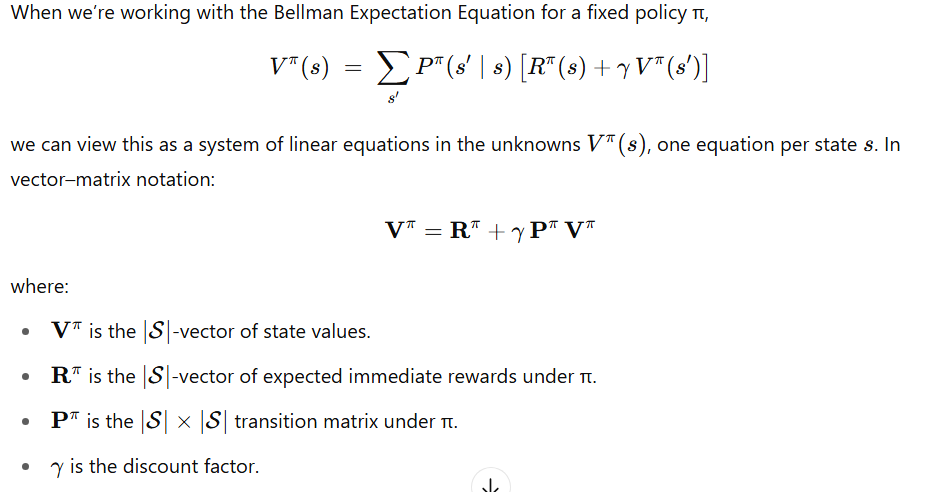

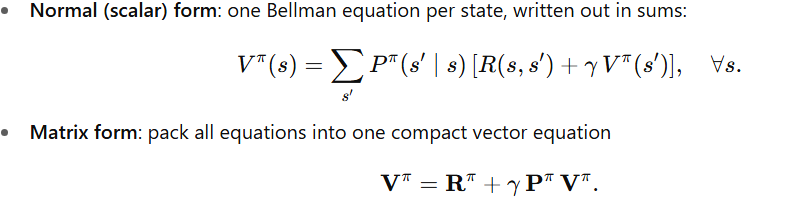

The normal (scalar) Bellman equations and the matrix form are just two lenses on the same linear system.

Writing it in matrix form exposes the fact that you can either (1) solve it exactly via a matrix inverse or (2) solve it approximately via iterative methods—and it lets you tap into the toolkit of linear algebra for analysis and optimization.

Passing to matrix form is simply an organizational convenience: it makes explicit that the Bellman system is linear.